# Home assigment 1

Please give your name below:

In [1]:
name='Jens aka the Snowdog'

## Exercise 2

When you enter a nuclear physics lab, you often find a nice [nuclide chart](https://en.wikipedia.org/wiki/Table_of_nuclides) on the wall. Now we will try to make our own, where we color the nuclides according to the average binding energy per nucleon of the nuclides.

Along this home assignment you find a file called 'HA1-relmass.txt' (downloaded from https://www.nist.gov/pml/atomic-weights-and-isotopic-compositions-relative-atomic-masses
). This contains a list of several nuclides in the following format:

```
    Atomic Number = 1
    Atomic Symbol = H
    Mass Number = 1
    Relative Atomic Mass = 1.00782503223(9)
    Isotopic Composition = 0.999885(70)
    Standard Atomic Weight = [1.00784,1.00811]
    Notes = m
```

Your task is going to be to 

- extract the information from the file 'HA1-relmass.txt' with python. Your interest will be the atomic number, symbol, mass number and relative atomic mass. Arrange the data into a dictionary of dictionaries, where the keys of the main dictionary are formatted as `symbolA` (eg. `H1`,`U235`), and the keys of the subdictionaries are `Z`, `A`, `m`). Note that the relative atomic mass is given with its uncertainty with a bracket notation (see further explanation of the notation [on Wikipedia](https://en.wikipedia.org/wiki/Uncertainty#Measurements), however you can ignore the uncertainty for this exercise. Thus the dictionary will look like:

```
    isotopes={'H1': {'Z': 1,'A': 1,'m': 1.00782503223},
              'D2': {'Z': 1,'A': 2,'m': 2.01410177812}
               ...}
```

- During the datalab you have written a function to calculate the average binding energy per nucleon. Use this function to calculate the binding energy of each nuclide, and include this information as another entry with key `'eps'` in the subdictionaries.

```
    isotopes={...,
              'D2': {'Z': 1,'A': 2,'m': 2.01410177812, 'eps': 1.1122897908460128},
               ...}
```

- Find out which nuclide has the highest binding energy per nucleon.
- Create a 2D numpy array called `NZ` which has 119 rows (the highest atomic number) and 178 columns (the highest neutron number). Fill it up with the binding energy per nucleon value.
- Plot the content of `NZ` with `plt.imshow()`. (hint: for N-Z pairs for which no known nuclide exists you probably allocated 0.0 as the binding energy. The default colormap of matplotlib will color these values as blue. If you want these values to be colored white you can convert all 0.0 values to `np.nan`.)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# extract the data from the txt file
data = [] # store all the elements
with open('HA1-relmass.txt','r') as file: # open file
    element = {}
    for line in file:
        # Check if line is not empty
        if line.strip():
            key, value = line.split('=', 1)
            element[key.strip()] = value.strip()
        else:
            # When a blank line is encountered, save the current element and start a new one
            data.append(element)
            element = {}
    # Append the last element if file doesn't end with a blank line
    if element:
        data.append(element)

# format dictionary as specified
elements = {}
for element in data:
    sym = element['Atomic Symbol']
    A = element['Mass Number']
    Z = element['Atomic Number']
    name = str(sym+A)
    m_clean = element['Relative Atomic Mass'].split('(')[0]
    # Converting to float
    vals = {'Z': int(Z), 'A' : int(A), 'm': float(m_clean)}
    elements.update({f'{name}': vals})

In [3]:
# function to calculate the binding energy pr. nucleon (remember electron mass!)
def BAZ(A,Z,m):
    mp=1.007276466621
    mn=1.00866491588 
    muc2=931.49410242 #MeV
    me = 5.489*10**(-4)
    B = (Z*mp + (A-Z)*mn - (m-Z*me))*muc2
    eps = B/A
    return eps

In [4]:
# calculate and add it to the elements dictionary
for e in elements:
    A = elements[e]['A']
    Z = elements[e]['Z']
    m = elements[e]['m']
    B = BAZ(A, Z, m)
    elements[e].update({'eps':B})

In [5]:
# change values of the Z,N 2D array to the binding energy of the specific nucleus
z = 119
n = 178
NZ = np.zeros((z,n))
for e in elements:
    A = elements[e]['A']
    Z = elements[e]['Z']
    N = A - Z
    NZ[Z,N] = elements[e]['eps']

Text(0, 0.5, 'N')

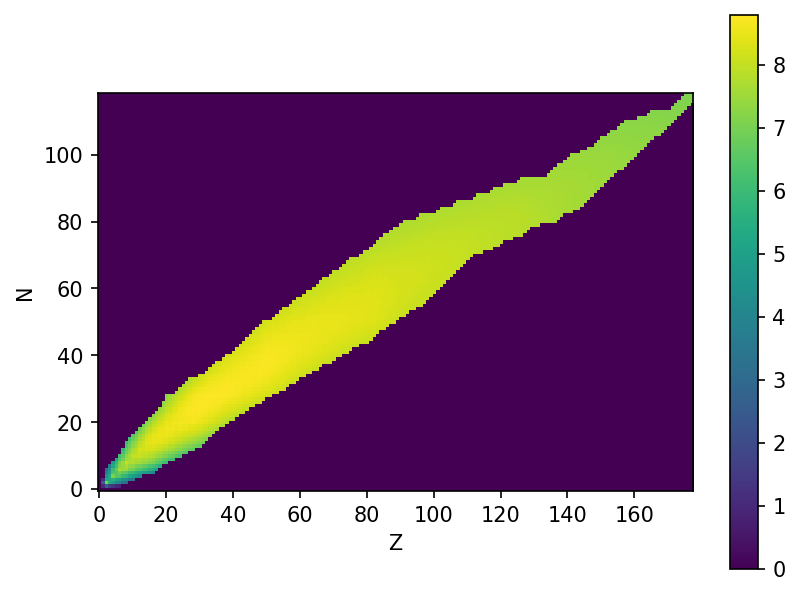

In [6]:
# plot the 2D array
plt.figure(dpi=150)
plt.imshow(NZ, origin='lower')
plt.colorbar()
plt.xlabel('Z')
plt.ylabel('N')

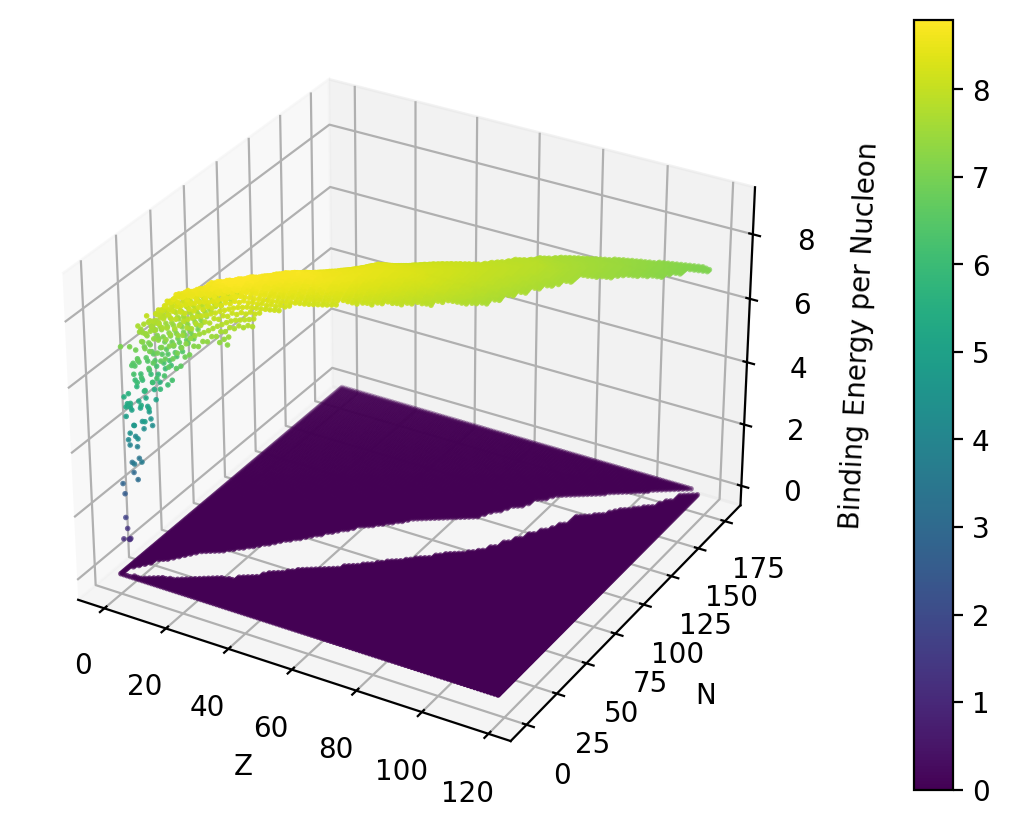

In [21]:
from mpl_toolkits.mplot3d import Axes3D
binding_energy = NZ 

# Create meshgrid for the indices
x = np.arange(binding_energy.shape[0])
y = np.arange(binding_energy.shape[1])
X, Y = np.meshgrid(x, y)

fig = plt.figure(dpi=200,figsize=(16,5))
ax = fig.add_subplot(111, projection='3d')

surf = ax.scatter(X, Y, binding_energy.T, c=binding_energy.T, s=1)

fig.colorbar(surf)

ax.set_xlabel('Z')
ax.set_ylabel('N')
ax.set_zlabel('Binding Energy per Nucleon')

plt.show()